# Analysis of weather change and paterns for New York State from 2015 Jan 1 to 2020 Dec 31

authors: Ravi Konjeti, Lakshmi Bhavani and Aleksandar Kamenev

## Data Dictionary 

Weather Data for NY state from 2015 to 2020 inclusive, from 5 stations across the state

source: https://www.ncdc.noaa.gov/cdo-web/datasets

    - STATION: Station identification code
    - NAME: Name of the station (usually city/airport name)
    - LATITUDE: (decimated degrees w/northern hemisphere values > 0, southern hemisphere values < 0)
    - LONGITUDE: (decimated degrees w/western hemisphere values < 0, eastern hemisphere values > 0)
    - ELEVATION: above mean sea level (tenths of meters)
    - DATE: Year of the record (4 digits) followed by month (2 digits) and day (2 digits)
    - AWND: Average daily wind speed
    - PRCP: Precipitation 
    - SNOW: Snowfall
    - SNWD: Snow depth
    - TAVG: Average temperature
    - TMAX: Maximum temperature
    - TMIN: Minimum temperature 
    - WDF2: Direction of fastest 2-minute wind (degrees)
    - WSF2: Fastest 2-minute wind speed
    
Please see http://www1.ncdc.noaa.gov/pub/data/ghcn/daily/ghcnd-stations.txt for a complete list of stations and their metadata.

# 1. Import libraries and load dataset

### Imports

In [1]:
import pandas as pd
import edapy.datainfo as d_info
import edapy.load_data as d_load
import edapy.plot as my_plot
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

### Load data 

In [2]:
# load in data 
weather_df = d_load.load_df(r'data\dataset.csv')

In [3]:
# instantiate custom package class for eda 
data = d_info.DataInfo(weather_df)

The method called below shows the first 5 records in the df so we can get a feel for the data. It also lists the features present and gives information about the feature name, number of non-null values, and data type.

In [4]:
data.describe()

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,AWND,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN,WDF2,WSF2
0,USW00014733,"BUFFALO NIAGARA INTERNATIONAL, NY US",42.93998,-78.73606,216.2,2015-01-01,24.61,0.00,0.3,1.2,23.0,32.0,20.0,240,40.0
1,USW00014733,"BUFFALO NIAGARA INTERNATIONAL, NY US",42.93998,-78.73606,216.2,2015-01-02,13.20,0.00,0.0,1.2,31.0,33.0,22.0,250,29.1
2,USW00014733,"BUFFALO NIAGARA INTERNATIONAL, NY US",42.93998,-78.73606,216.2,2015-01-03,8.50,0.58,0.0,0.0,27.0,48.0,22.0,60,15.0
3,USW00014733,"BUFFALO NIAGARA INTERNATIONAL, NY US",42.93998,-78.73606,216.2,2015-01-04,17.67,0.52,0.0,0.0,44.0,55.0,28.0,250,38.0
4,USW00014733,"BUFFALO NIAGARA INTERNATIONAL, NY US",42.93998,-78.73606,216.2,2015-01-05,19.24,0.00,0.1,0.0,20.0,28.0,9.0,270,31.1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10960 entries, 0 to 10959
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   STATION    10960 non-null  object 
 1   NAME       10960 non-null  object 
 2   LATITUDE   10960 non-null  float64
 3   LONGITUDE  10960 non-null  float64
 4   ELEVATION  10960 non-null  float64
 5   DATE       10960 non-null  object 
 6   AWND       10957 non-null  float64
 7   PRCP       10959 non-null  float64
 8   SNOW       10960 non-null  float64
 9   SNWD       10960 non-null  float64
 10  TAVG       10593 non-null  float64
 11  TMAX       10959 non-null  float64
 12  TMIN       10959 non-null  float64
 13  WDF2       10960 non-null  int64  
 14  WSF2       10960 non-null  float64
dtypes: float64(11), int64(1), object(3)
memory usage: 1.3+ MB


None

### Observation 1.01

From the above information, some key details about the data set present can be observed.

1. For the most part we have numeric values but there are some object time values.

    - STATION & NAME are strong candidates for conversion to String and also can potentially be seen as candidates for categorical encoding (one-hot encoding). However, since we will only be using these values for identification of the stations, the splitting of the data and no predictions will be made on what station the data point is from as this is not of interest to this research we will not focus on these two features beyond use for splitting and differentiation between station to perform comparisons on other features.
    
    - DATE is a good candidate for conversion to date-time format and base of comparison when doing time series analysis.


2. The total number of features is 14, the total number of records are 10960 and some missing records are present. More about missing records in the next section.

In [5]:
# to date-time format
data.to_date_time("DATE")
# While we can convert to string, two questions arise. Is it needed? Is one hot encoding not more beneficial.
# data.as_string("STATION", "NAME")

# 2. Check for missing values

The method called below gives information in detail about the number of missing and present values per feature in the dataset as well as provide details about the possible values a feature may have and the number of times they occur. More on this will follow later on in the notebook when we visualize data per feature looking for the outlier.

In [6]:
data.nulls()


Show number of missing instances per feature 
--------------------


STATION        0
NAME           0
LATITUDE       0
LONGITUDE      0
ELEVATION      0
DATE           0
AWND           3
PRCP           1
SNOW           0
SNWD           0
TAVG         367
TMAX           1
TMIN           1
WDF2           0
WSF2           0
dtype: int64


Show number of present instances per feature 
--------------------


STATION      10960
NAME         10960
LATITUDE     10960
LONGITUDE    10960
ELEVATION    10960
DATE         10960
AWND         10957
PRCP         10959
SNOW         10960
SNWD         10960
TAVG         10593
TMAX         10959
TMIN         10959
WDF2         10960
WSF2         10960
dtype: int64

Shape (10960, 15)

** ** ** ** ** ** ** ** ** ** 

Feature: STATION

Number of unique values: 5 

['USW00014733' 'USW00014735' 'USW00004725' 'USW00004781' 'USW00094789']
_ _ _ _ _ _ _ _ _ _ _ _ _ _

USW00014733    2192
USW00014735    2192
USW00004725    2192
USW00004781    2192
USW00094789    2192
Name: STATION, dtype: int64
___________________________


** ** ** ** ** ** ** ** ** ** 

Feature: NAME

Number of unique values: 5 

['BUFFALO NIAGARA INTERNATIONAL, NY US'
 'ALBANY INTERNATIONAL AIRPORT, NY US' 'BINGHAMTON GREATER AP, NY US'
 'ISLIP LI MACARTHUR AIRPORT, NY US' 'JFK INTERNATIONAL AIRPORT, NY US']
_ _ _ _ _ _ _ _ _ _ _ _ _ _

BUFFALO NIAGARA INTERNATIONAL, NY US    2192
ALBANY INTERNATIONAL AIRPORT, NY US     2192
BINGHAMTON GREATER AP, NY US            2192
ISLIP LI MACARTHUR AIRPORT, NY US       2192
JFK INTERNATIONAL AIRPORT, NY US        2192
Name: NAME, dtype: int64
___________________________


** ** ** ** ** ** ** ** ** ** 

Feature: LATITUDE

Number of unique values:

None

The method called below shows the instances where there are missing records separated based on feature which has missing values.

In [7]:
list_names = data.get_column_names_where_missing_data()
print(list_names)
data.show_missing(*list_names)

Index(['AWND', 'PRCP', 'TAVG', 'TMAX', 'TMIN'], dtype='object')

Feature name: AWND


,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,AWND,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN,WDF2,WSF2
6049,USW00004725,"BINGHAMTON GREATER AP, NY US",42.20678,-75.97993,485.7,2019-07-24,NaN,0.00,0.0,0.0,69.0,75.0,55.0,360,13.0
7349,USW00004781,"ISLIP LI MACARTHUR AIRPORT, NY US",40.79389,-73.10181,25.4,2017-02-12,NaN,0.04,0.4,9.8,34.0,40.0,30.0,10,6.9
8170,USW00004781,"ISLIP LI MACARTHUR AIRPORT, NY US",40.79389,-73.10181,25.4,2019-05-14,NaN,0.07,0.0,0.0,47.0,52.0,44.0,30,10.1



Feature name: PRCP


,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,AWND,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN,WDF2,WSF2
3734,USW00014735,"ALBANY INTERNATIONAL AIRPORT, NY US",42.74722,-73.79913,85.4,2019-03-23,21.03,NaN,0.4,0.0,32.0,37.0,28.0,300,36.0



Feature name: TAVG


,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,AWND,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN,WDF2,WSF2
334,USW00014733,"BUFFALO NIAGARA INTERNATIONAL, NY US",42.93998,-78.73606,216.2,2015-12-01,7.61,0.10,0.0,0.0,NaN,53.0,39.0,230,18.1
335,USW00014733,"BUFFALO NIAGARA INTERNATIONAL, NY US",42.93998,-78.73606,216.2,2015-12-02,6.71,0.02,0.0,0.0,NaN,49.0,34.0,240,17.0
336,USW00014733,"BUFFALO NIAGARA INTERNATIONAL, NY US",42.93998,-78.73606,216.2,2015-12-03,11.41,0.01,0.0,0.0,NaN,44.0,33.0,280,21.0
337,USW00014733,"BUFFALO NIAGARA INTERNATIONAL, NY US",42.93998,-78.73606,216.2,2015-12-04,11.63,0.00,0.0,0.0,NaN,44.0,38.0,240,28.0
338,USW00014733,"BUFFALO NIAGARA INTERNATIONAL, NY US",42.93998,-78.73606,216.2,2015-12-05,4.92,0.00,0.0,0.0,NaN,45.0,31.0,230,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2095,USW00014733,"BUFFALO NIAGARA INTERNATIONAL, NY US",42.93998,-78.73606,216.2,2020-09-26,8.50,0.00,0.0,0.0,NaN,80.0,57.0,210,16.1
2096,USW00014733,"BUFFALO NIAGARA INTERNATIONAL, NY US",42.93998,-78.73606,216.2,2020-09-27,12.75,0.00,0.0,0.0,NaN,82.0,65.0,210,25.9
2097,USW00014733,"BUFFALO NIAGARA INTERNATIONAL, NY US",42.93998,-78.73606,216.2,2020-09-28,10.51,0.01,0.0,0.0,NaN,80.0,62.0,220,31.1
2098,USW00014733,"BUFFALO NIAGARA INTERNATIONAL, NY US",42.93998,-78.73606,216.2,2020-09-29,8.50,0.41,0.0,0.0,NaN,67.0,54.0,250,25.1



Feature name: TMAX


,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,AWND,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN,WDF2,WSF2
5584,USW00004725,"BINGHAMTON GREATER AP, NY US",42.20678,-75.97993,485.7,2018-04-15,17.9,0.0,0.0,0.0,38.0,NaN,NaN,130,29.1



Feature name: TMIN


,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,AWND,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN,WDF2,WSF2
5584,USW00004725,"BINGHAMTON GREATER AP, NY US",42.20678,-75.97993,485.7,2018-04-15,17.9,0.0,0.0,0.0,38.0,NaN,NaN,130,29.1


# 3. Visualize missing values

The method call below provides visualizations of the missing data in the dataset. This may be helpful to detect and show a correlation between missing values.

<AxesSubplot:>

<AxesSubplot:>

<AxesSubplot:>

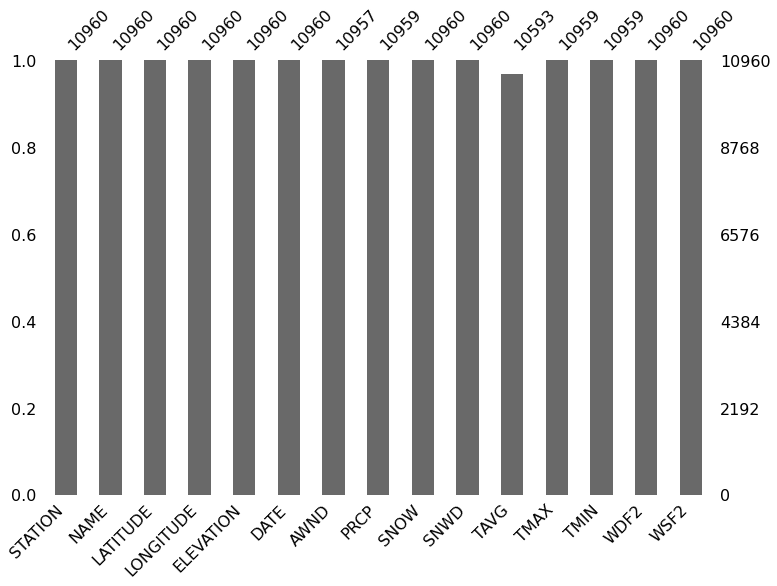

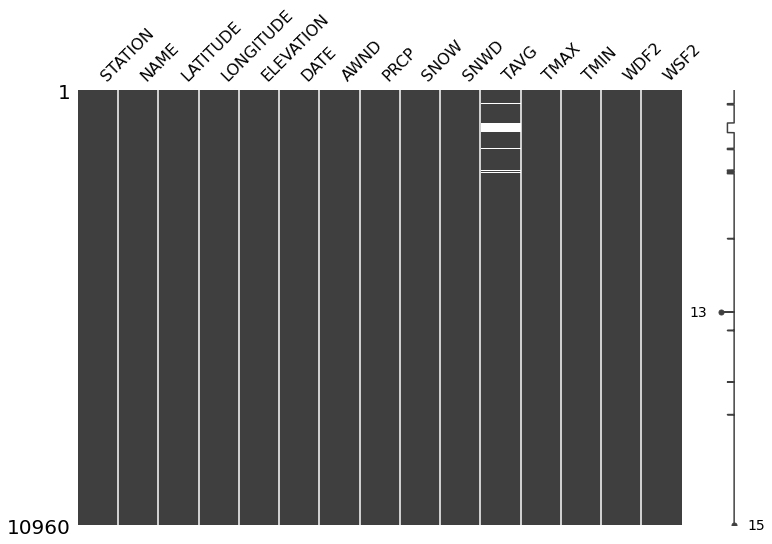

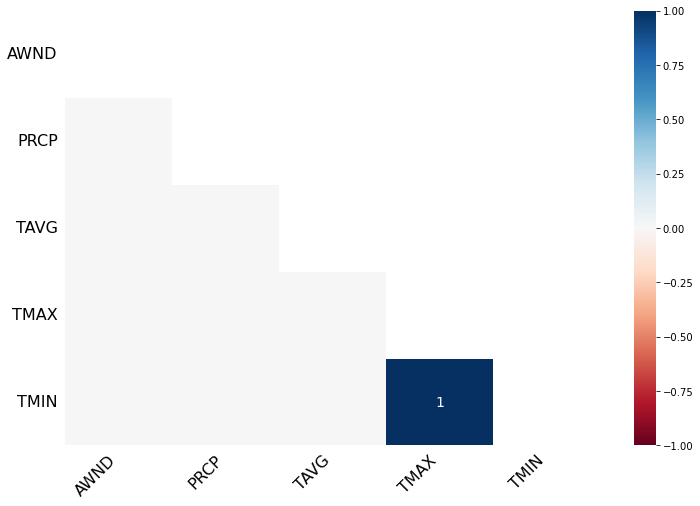

In [8]:
data.missing_bar_plot()

### Observation 3.01

From the above information we get a good idea from what data is missing and how to handle it.

1. As we are working with data points over a period of time and, each instance represents data for a particular date, it would be ideal not to lose/drop any rows. Therefore we will explore other options. There are quite a few build-in solutions to this problem. Back and forward fill and interpolate are a few such possibilities. However, we will use a custom approach to solve the issue of filling in missing data. 

2. For features: AWND, PRCP, TMAX, and TMIN, the fact that there are data points from several geographically close sources for the same date, will be leveraged.

3. To fill in missing values in the TAVG column, we will leverage the fact that each instance has data for min and max temperature on the given date. Adding TMAX and TMIN and dividing the result in two will give a close enough approximation to the actual value. It will serve as a theoretical approximation with high probability.

4. From the above heatmap on the missing data it is clear that only in the case of TMIN and TMAX when one is missing so is the other. 

# 4. Handle/replace missing values

Handle missing values in AWND, PRCP, TMAX, and TMIN 

In [9]:
# get list of missing with out TAVG
list_names = list_names.drop('TAVG')
list_names

Index(['AWND', 'PRCP', 'TMAX', 'TMIN'], dtype='object')

The below method call replaces missing values for the features in the list with the average value for all instances of that date. 

Sumation of n(1~i) / i

In [10]:
data.average_fill_in_missing(list_names)

The below call replaces missing value with average of two other features.

TAVG = (TMAX + TMIN) / 2

In [11]:
data.half_sum_fill_in_missing('TAVG')

Check to confirm data adjustments

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10960 entries, 0 to 10959
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   STATION    10960 non-null  object        
 1   NAME       10960 non-null  object        
 2   LATITUDE   10960 non-null  float64       
 3   LONGITUDE  10960 non-null  float64       
 4   ELEVATION  10960 non-null  float64       
 5   DATE       10960 non-null  datetime64[ns]
 6   AWND       10960 non-null  float64       
 7   PRCP       10960 non-null  float64       
 8   SNOW       10960 non-null  float64       
 9   SNWD       10960 non-null  float64       
 10  TAVG       10960 non-null  float64       
 11  TMAX       10960 non-null  float64       
 12  TMIN       10960 non-null  float64       
 13  WDF2       10960 non-null  int64         
 14  WSF2       10960 non-null  float64       
dtypes: datetime64[ns](1), float64(11), int64(1), object(2)
memory usage: 1.3+ MB


# 4.1 Data Distribution & Outliers

The below method call plots the histogram of each feature in the dataset. From this information, we can start to get an idea of how the data is distributed and so gain deeper insight.

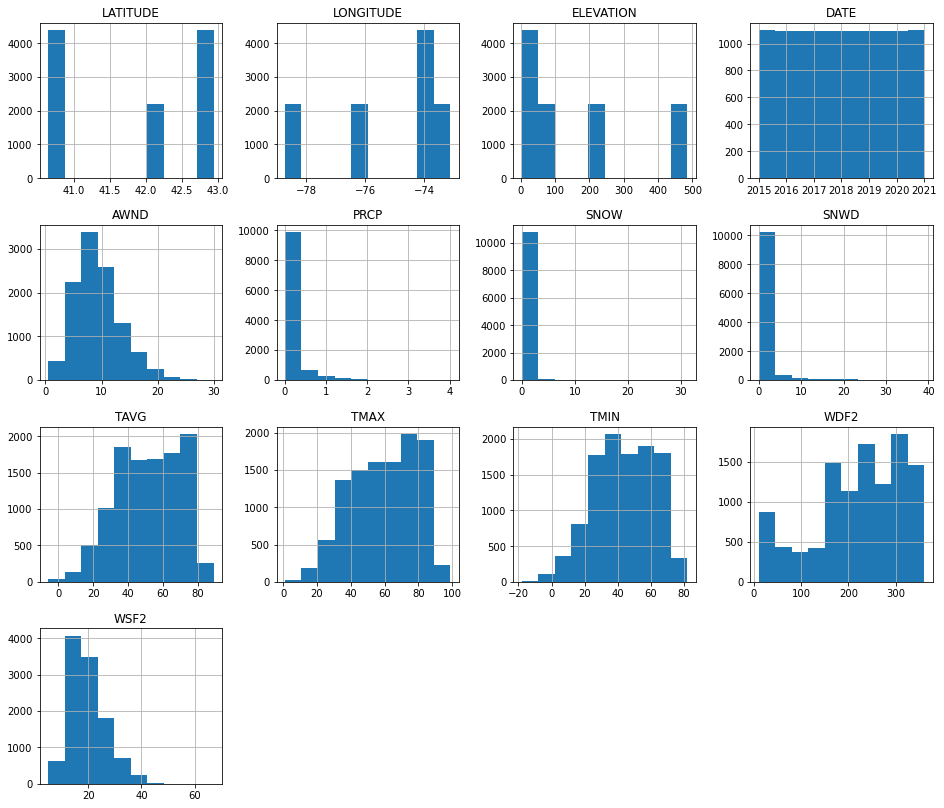

In [13]:
my_plot.plot_hist(data.get_df())

The below boxplot show how the data is distributed over the possible range of values per feature and gives insight into outlier values.

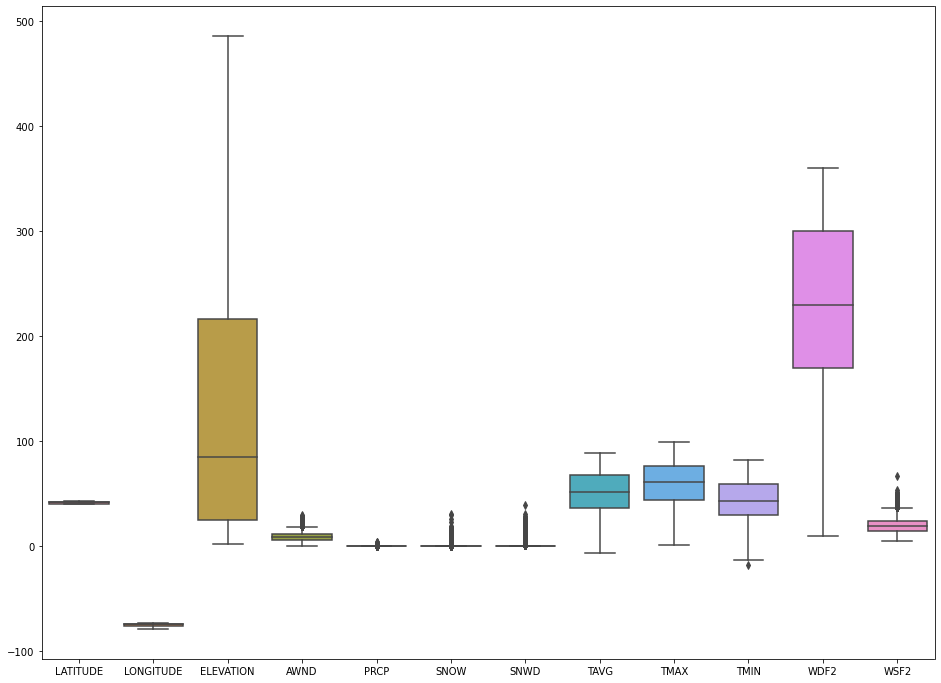

In [14]:
my_plot.plot_outliers(data.get_df())

<Figure size 432x288 with 0 Axes>

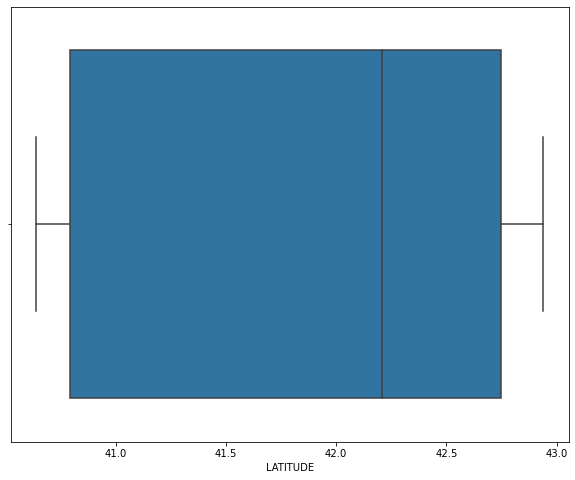

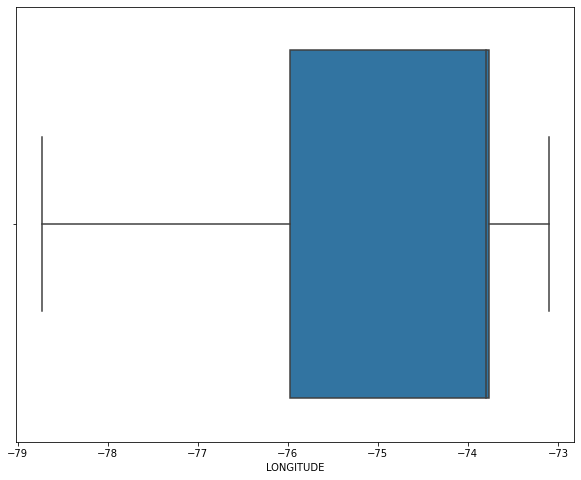

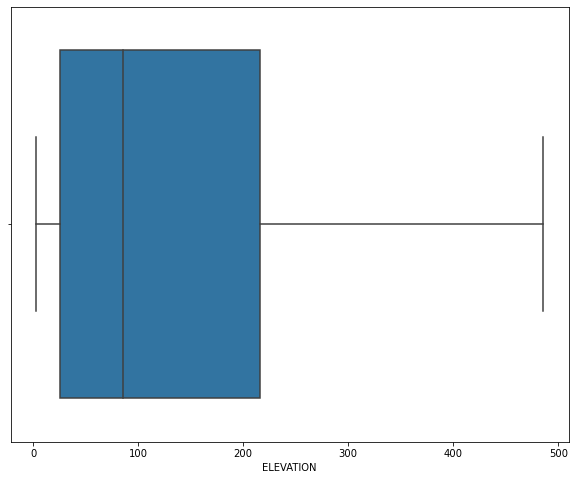

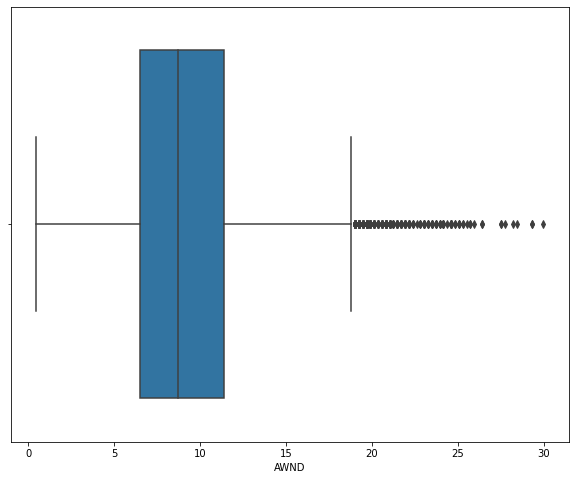

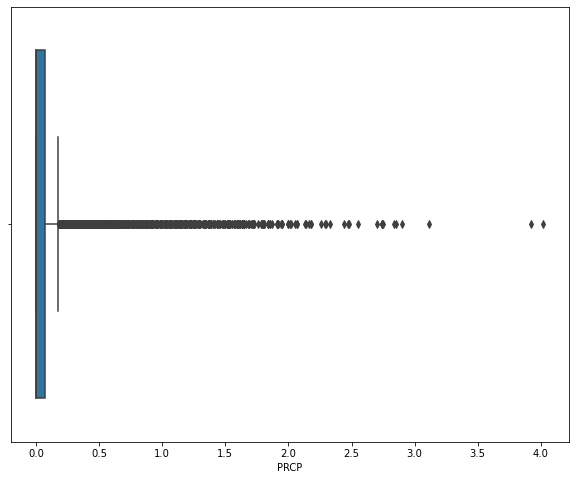

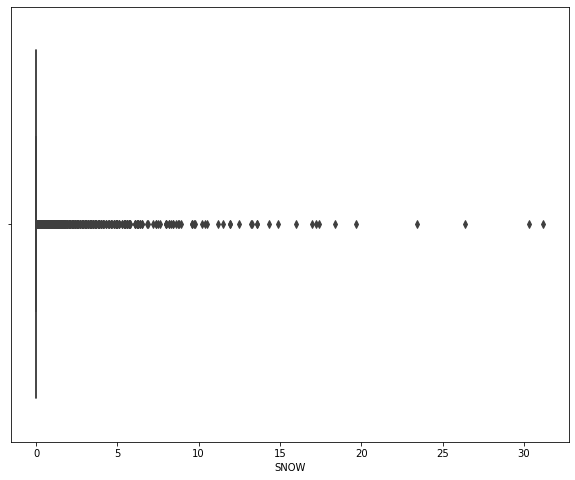

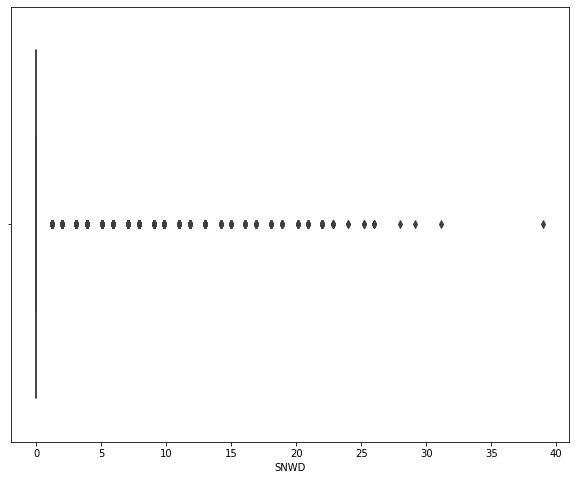

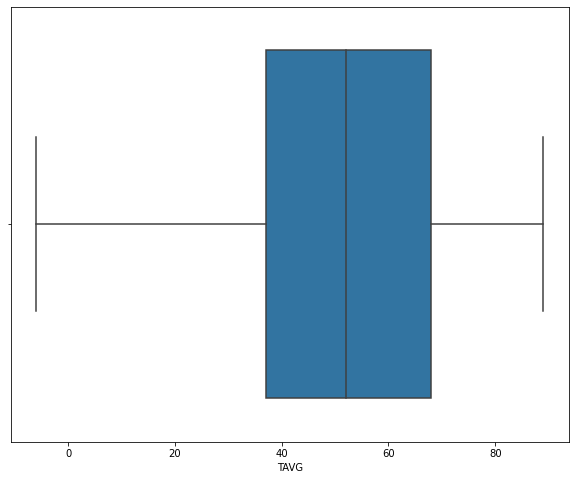

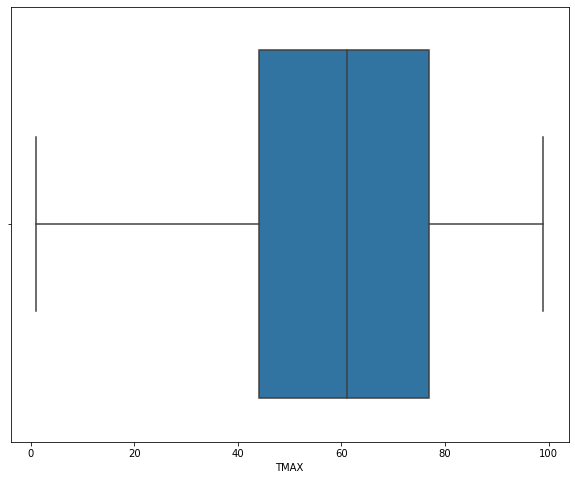

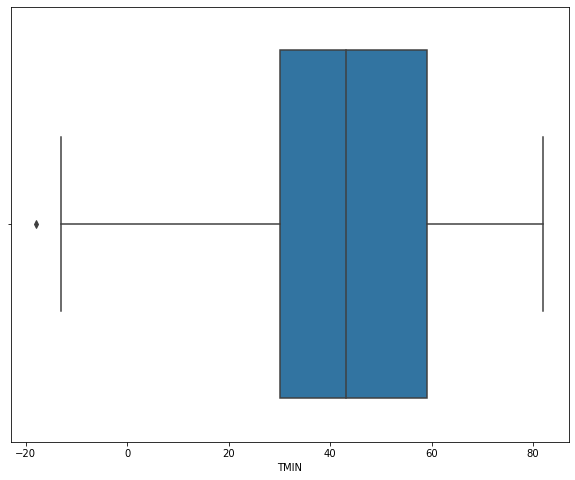

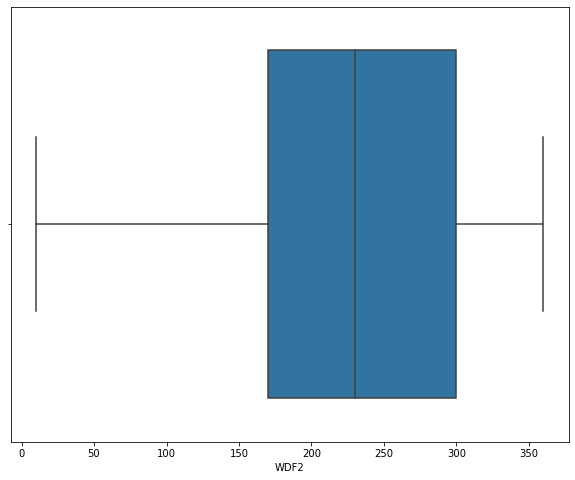

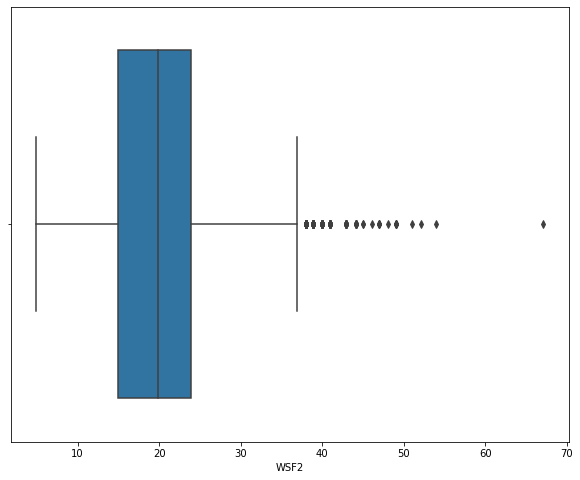

In [15]:
my_plot.plot_outlier_single_col_for_all(data.get_df())

## Observation 3.01

 1. While some values are considered outliers based on the box plots, such values are not unreasonable for weather conditions.

# 4.2 Split Dataset

Motiovation:
Splitting the dataset based on station or year may be beneficial for some comparisons and nonrepetitive code.


In [16]:
# get unique values in STATION feature 
list_of_stations = data.get_unique('STATION')

In [17]:
# make list of df split based on STATION name 
df_list_station = data.get_list_dfs(list_of_stations, 'STATION')

# 5. Visual Analysis

## Correlation Between Data 

<Figure size 432x288 with 0 Axes>

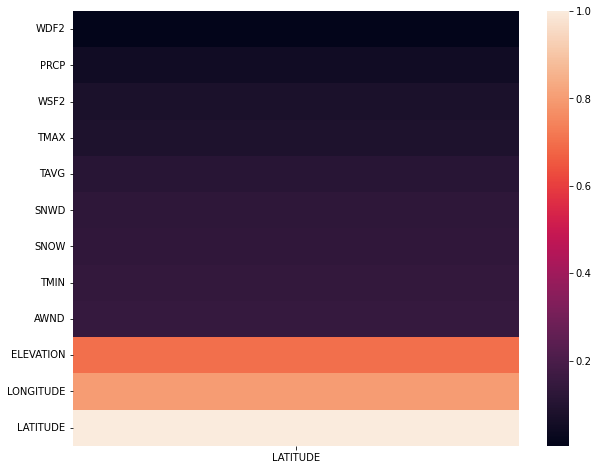

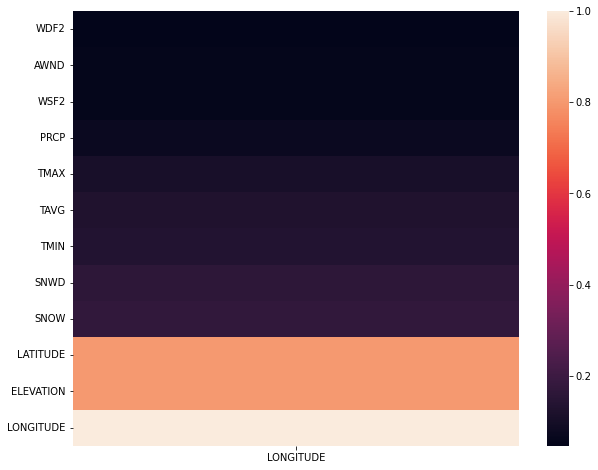

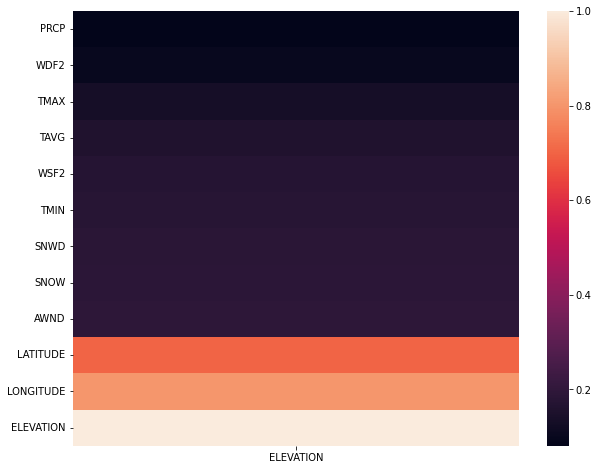

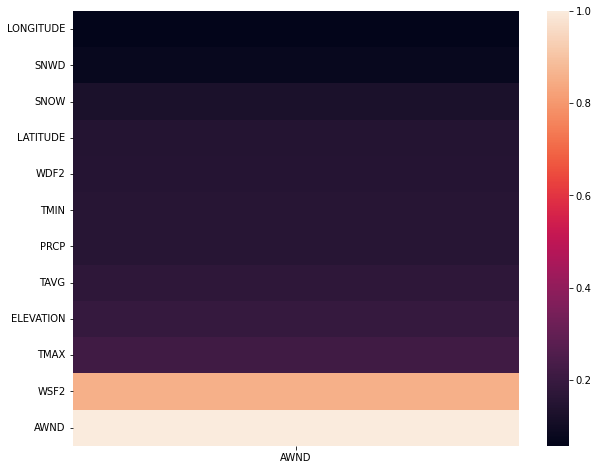

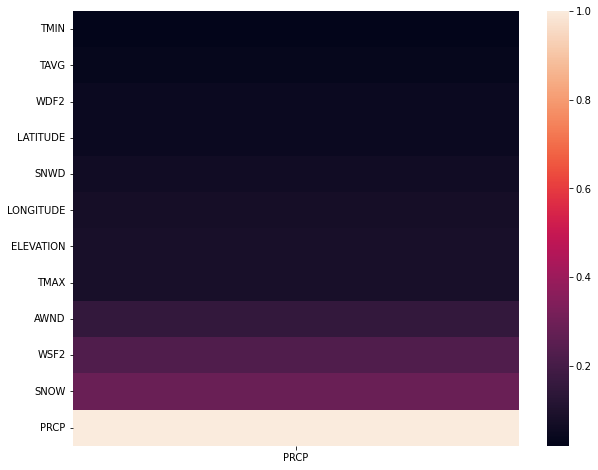

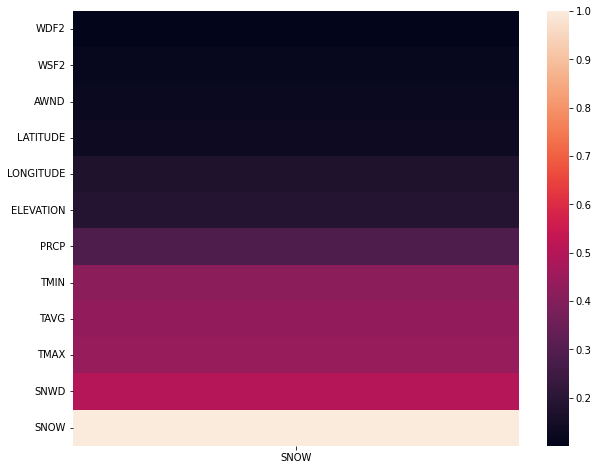

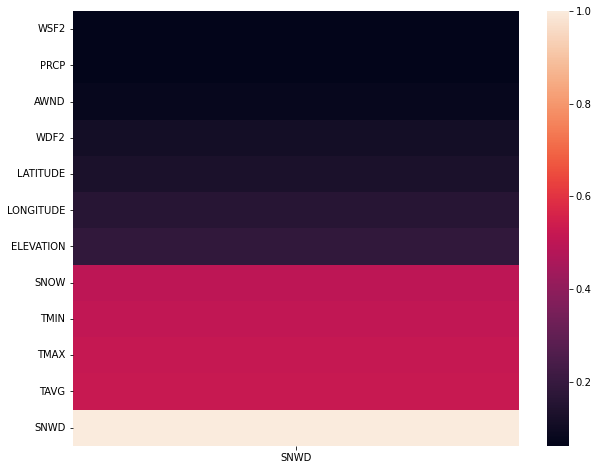

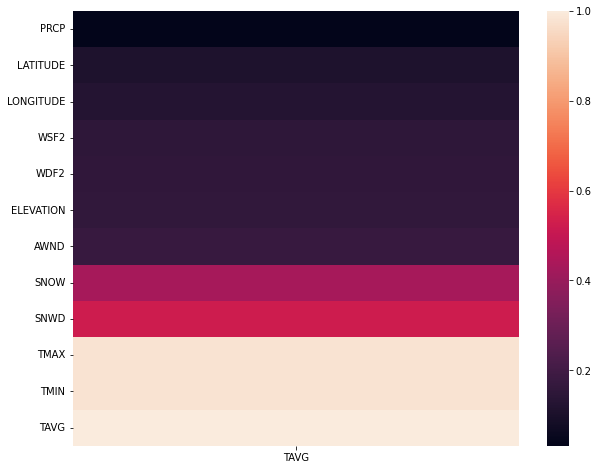

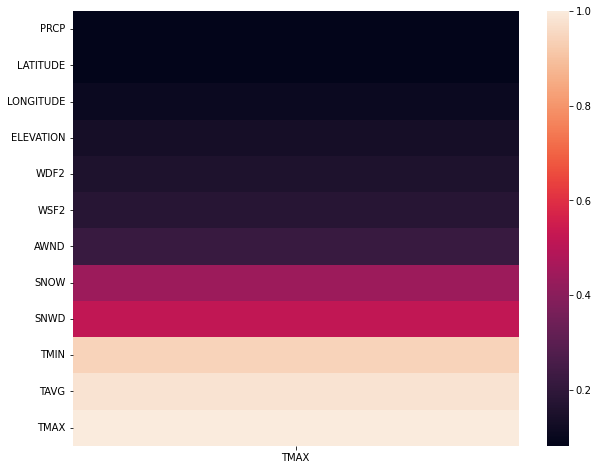

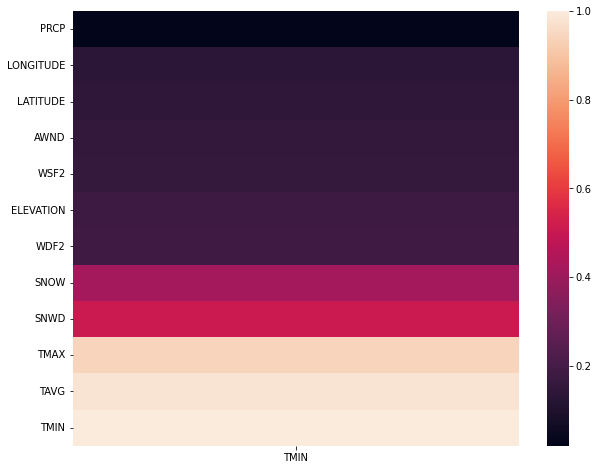

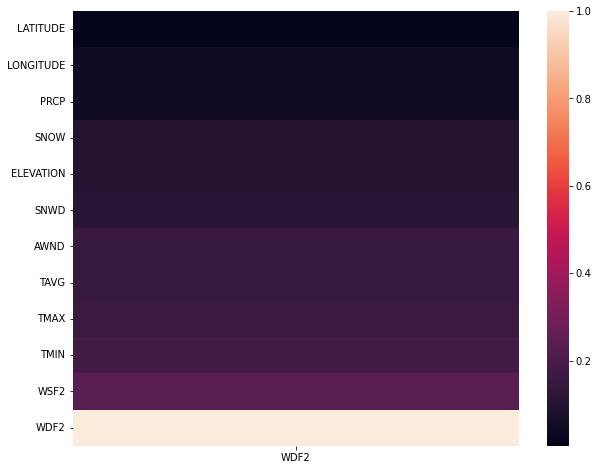

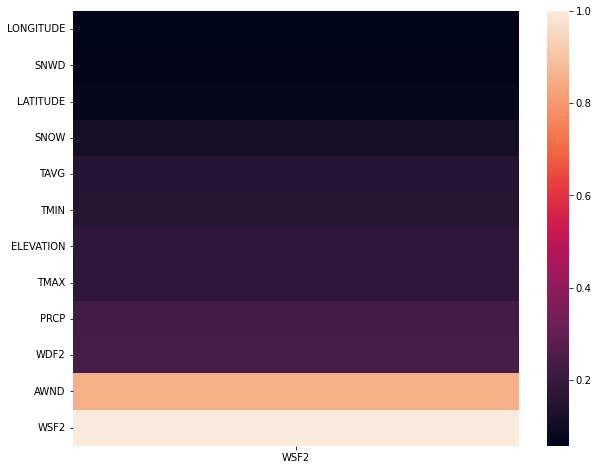

In [18]:
# spearman corr for all feature ecept name, station and date 
my_plot.plot_heat_map_per_feature(data.get_df(), 'spearman')

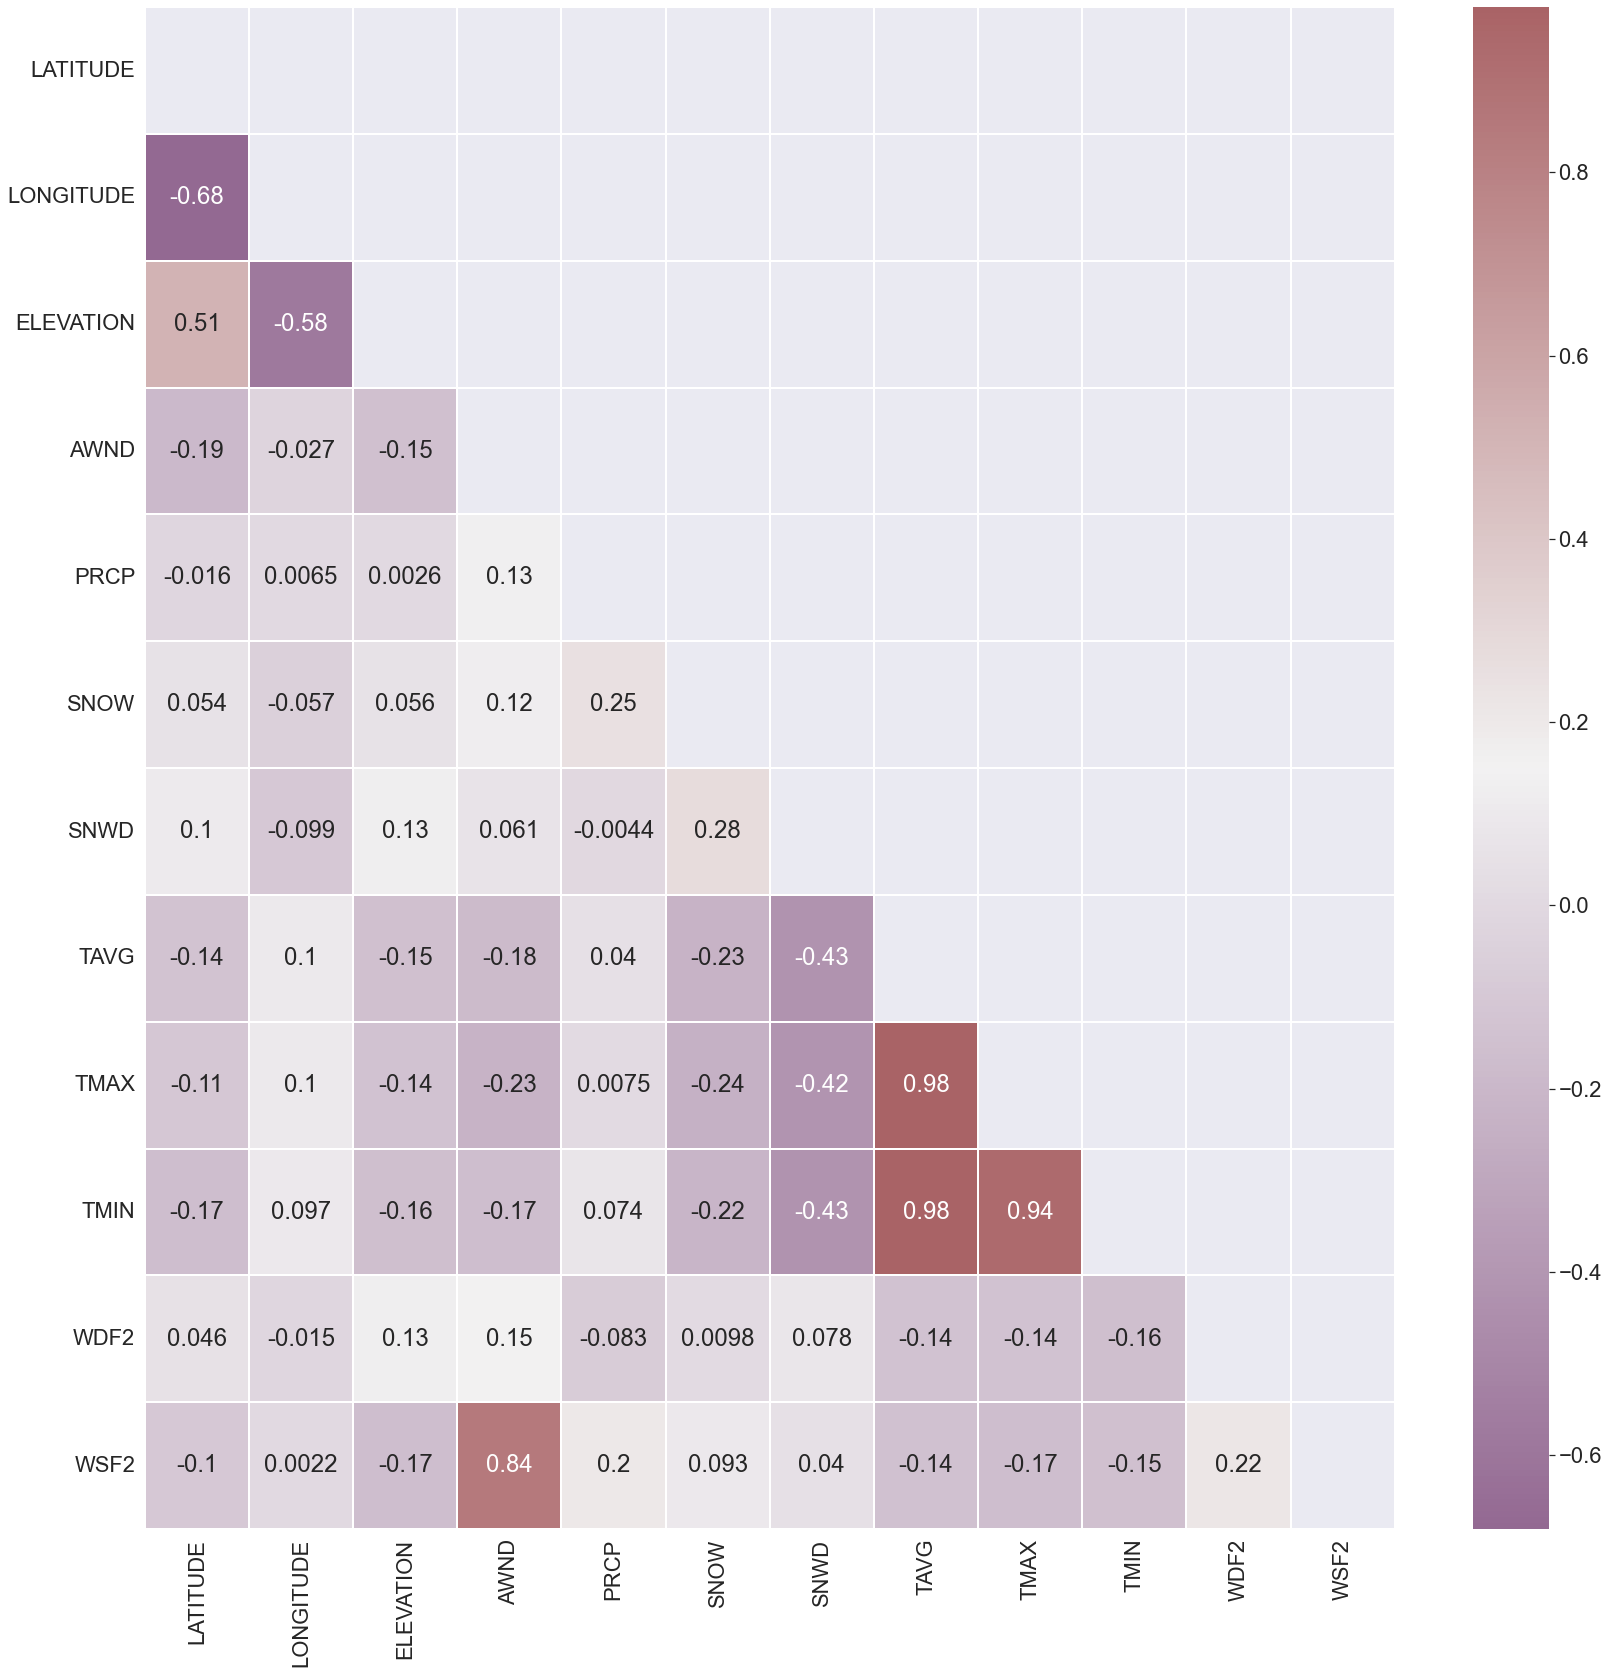

In [19]:
my_plot.heat_map(data.get_df())

## Observation 5.01

 1. The above heat maps show strong correlations between certain key features. While there are apparent relations, there are some which are very interesting.
 
     Strong corelations:
     - AWND and WSF2
     - TAVG and TMIN, TAVG and TMAX, TMAX and TMIN are obvious ones
     - 

## Min & Max Temperature analysis

The below plots show minimum and maximum temperature over the period split by STATION.

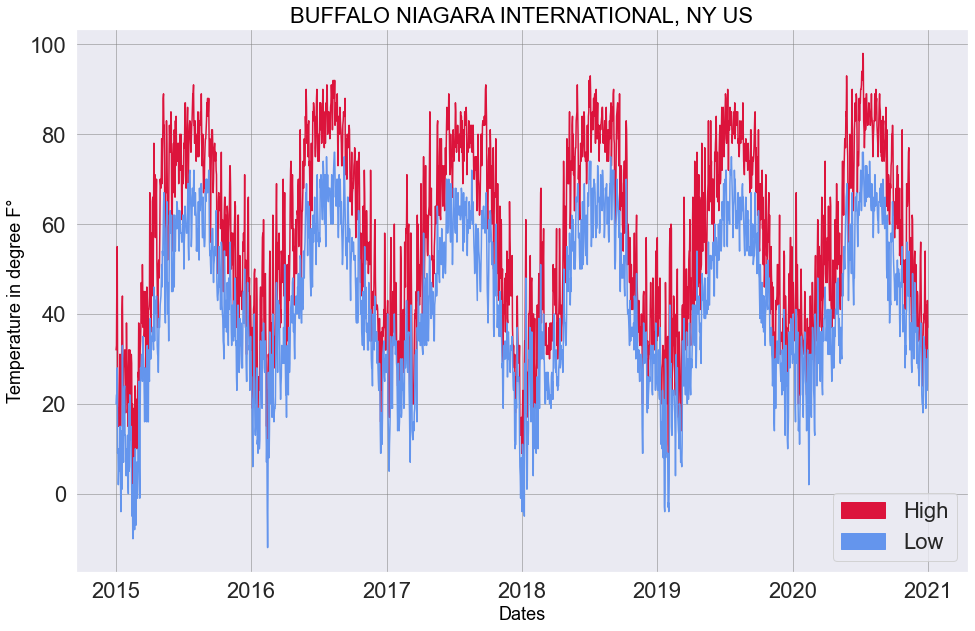

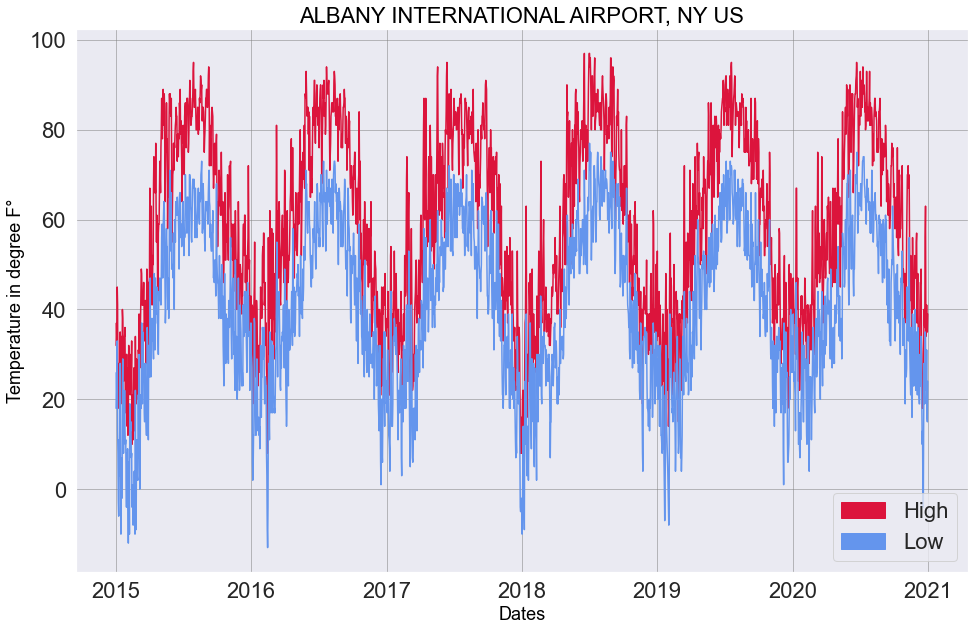

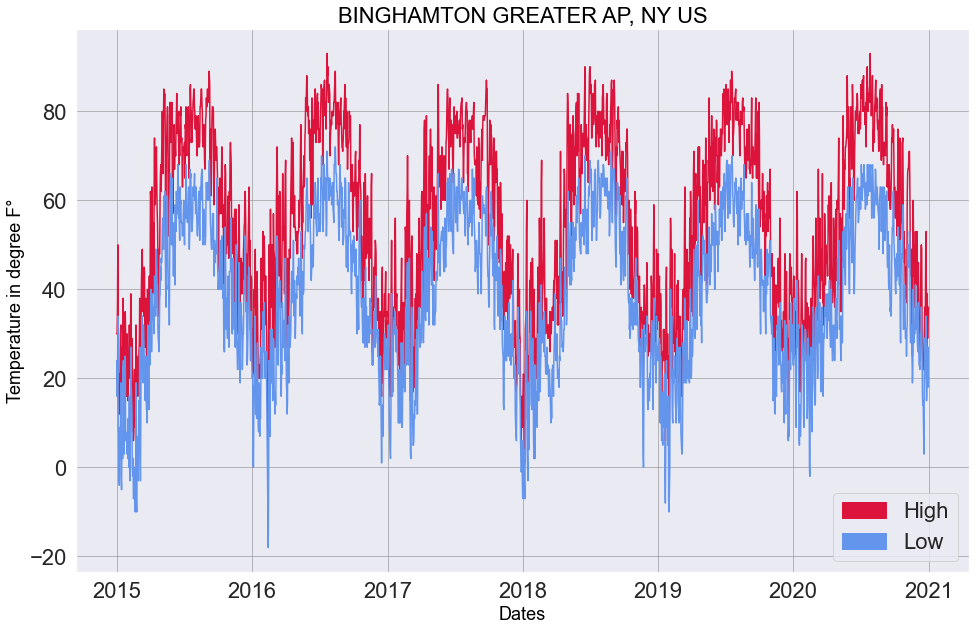

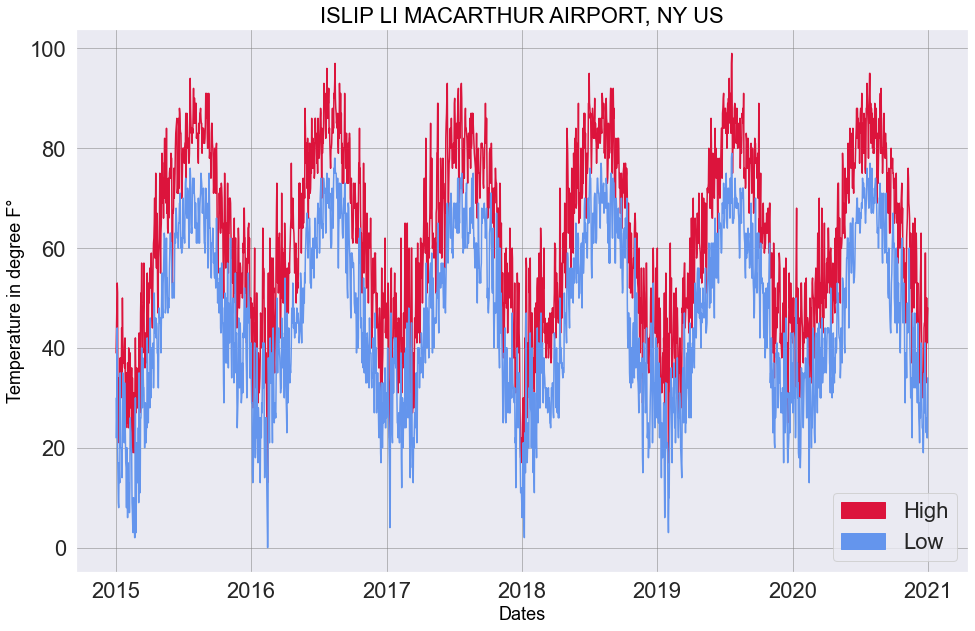

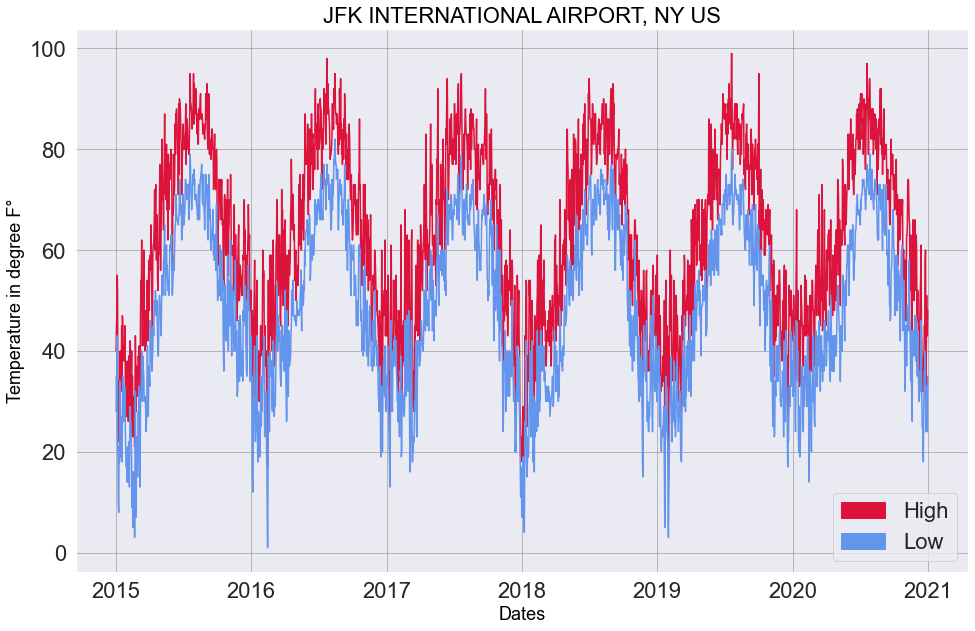

In [20]:
for df_section in df_list_station:
    my_plot.plot_temp_high_low(df_section)

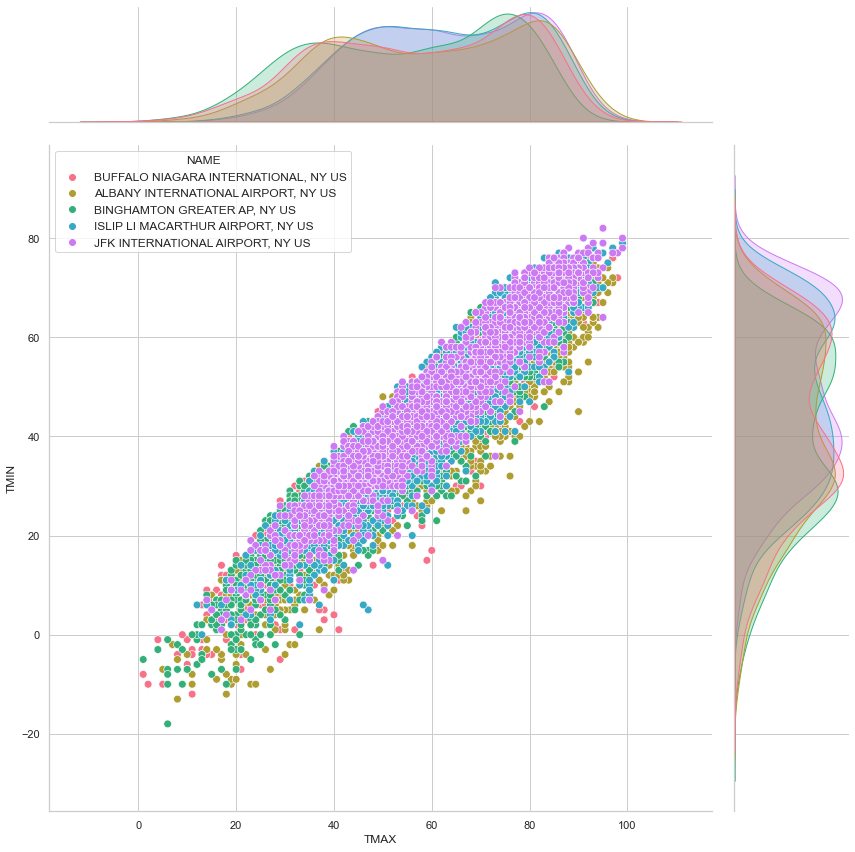

In [21]:
my_plot.join_plot_hue(data.get_df(), 'TMAX', 'TMIN', 'NAME')

The bellow plot is for TAVG over time period utalizing alternative more generic custom plot method

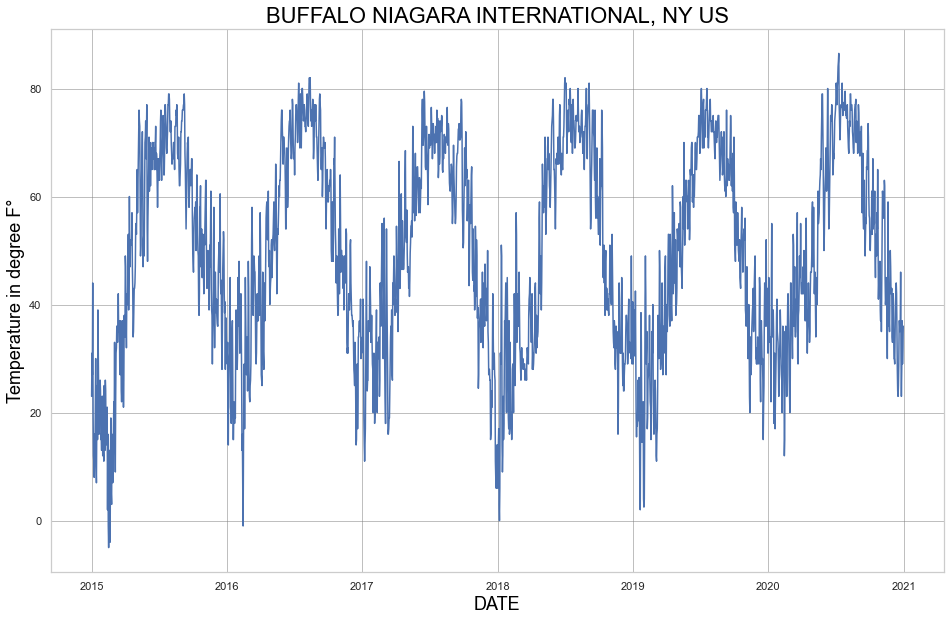

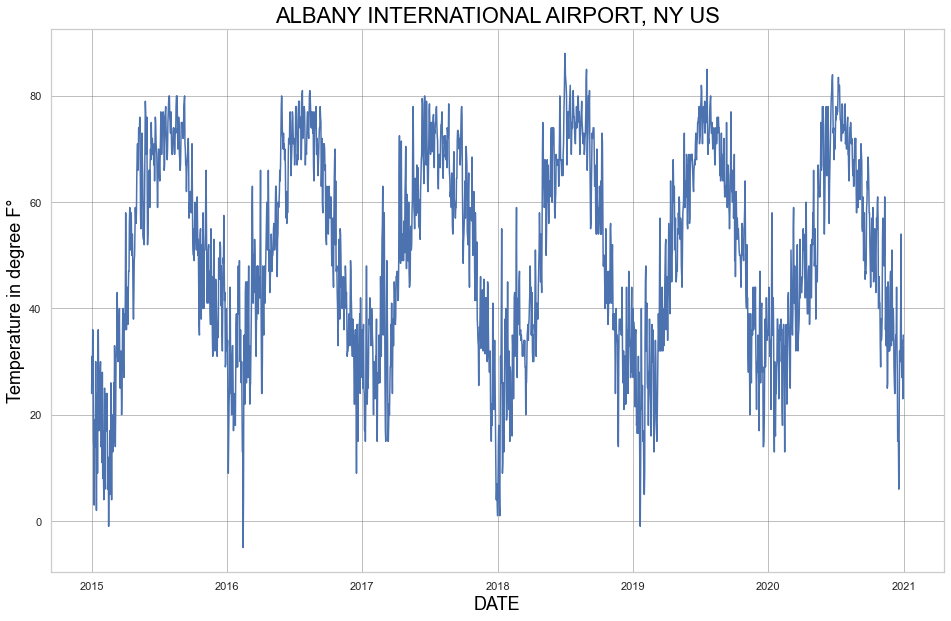

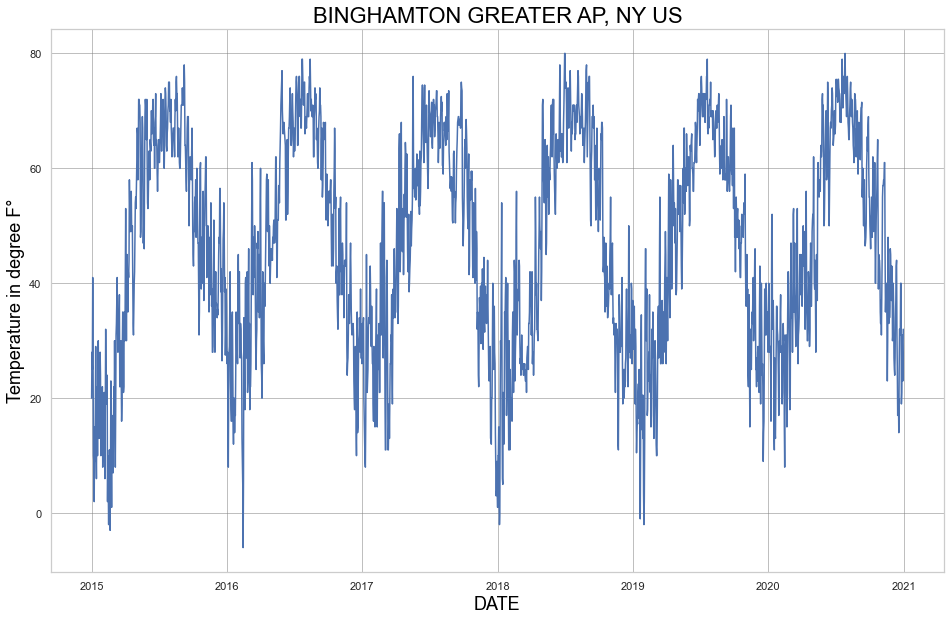

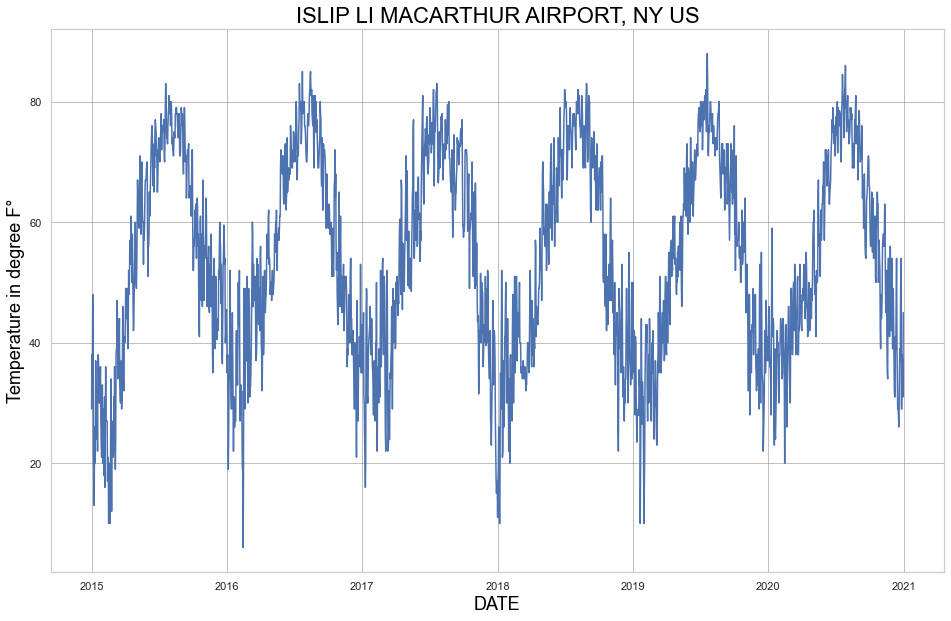

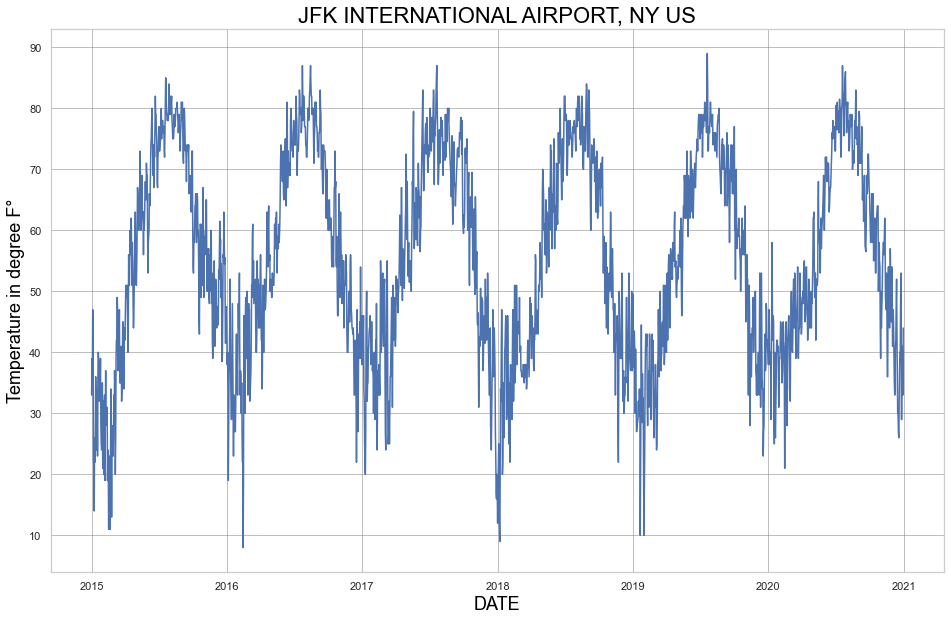

In [22]:
feature_list = ['TAVG']

for df_section in df_list_station:
    my_plot.plot_many(df_section, 'DATE', 'NAME', feature_list, 'Temperature in degree F°')

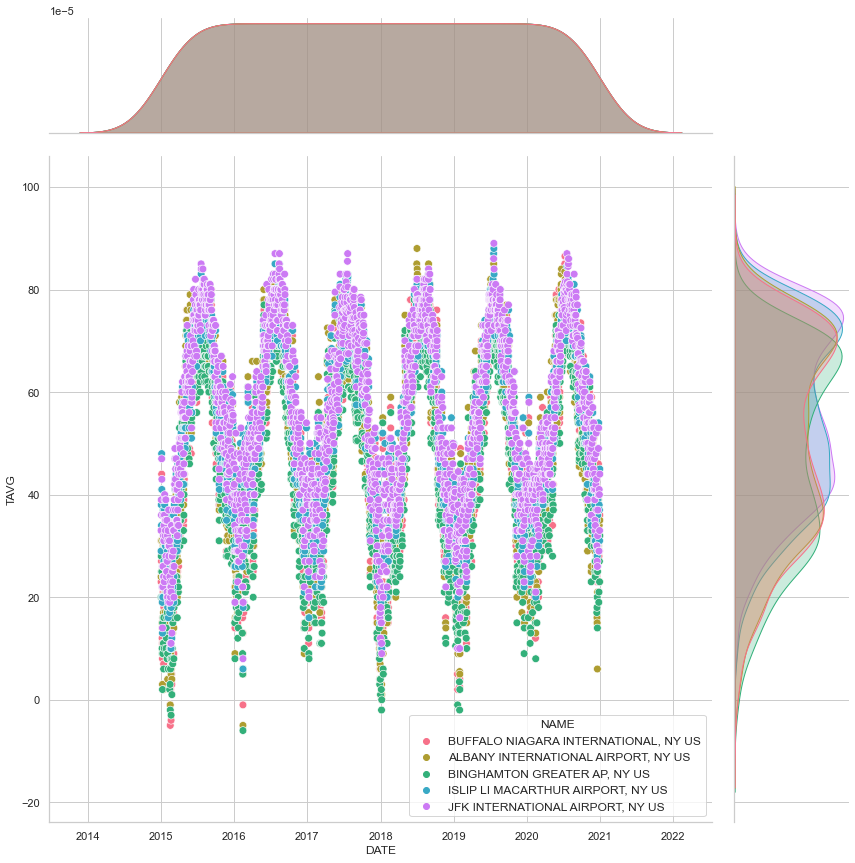

In [23]:
my_plot.join_plot_hue(data.get_df(), 'DATE', 'TAVG', 'NAME')

### Observation 5.02

From the above plots, an overall trend is observed as time progresses the difference between min and max temperature decreases, and both those values increase. Therefore, a trend of increase in temperature is present.

# Fastest 2-minute wind speed & Average daily wind speed

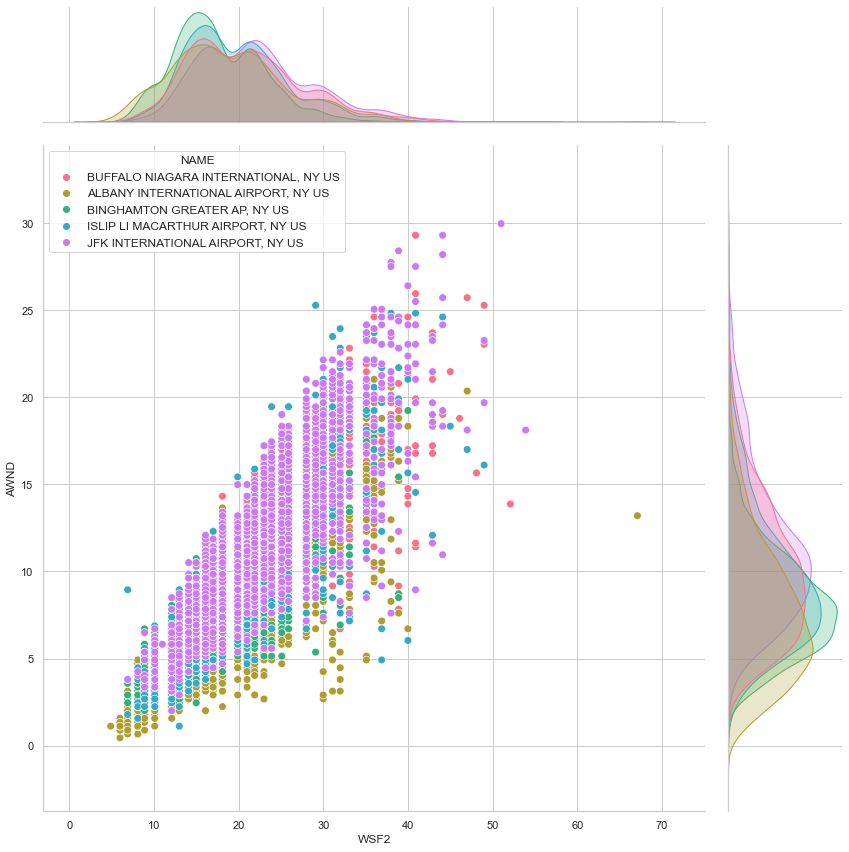

In [24]:
my_plot.join_plot_hue(data.get_df(), 'WSF2', 'AWND', 'NAME')

Note: Here we can make observations about how windy a particular part of the state is.

## Precipitation

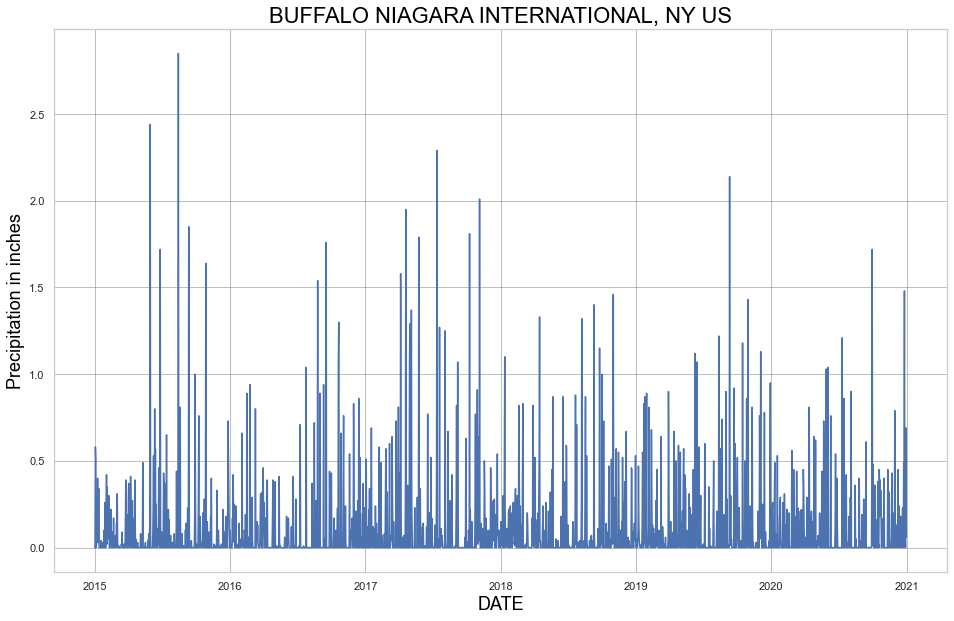

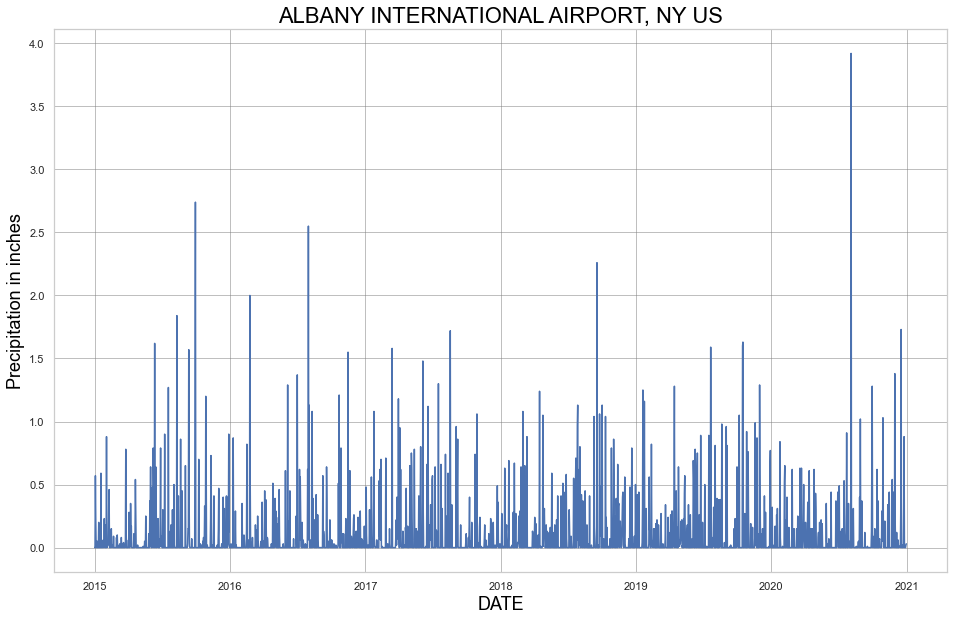

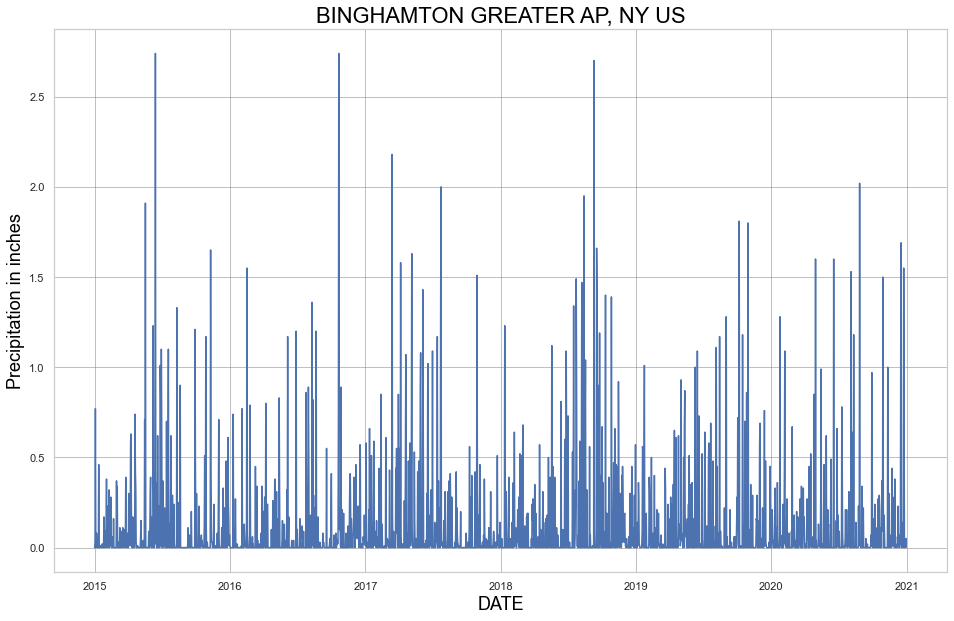

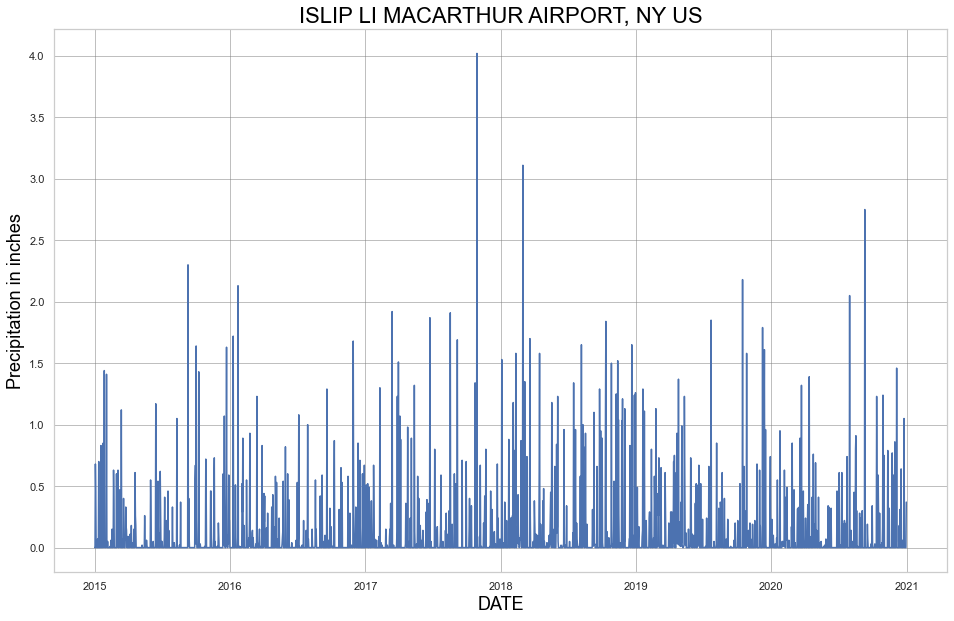

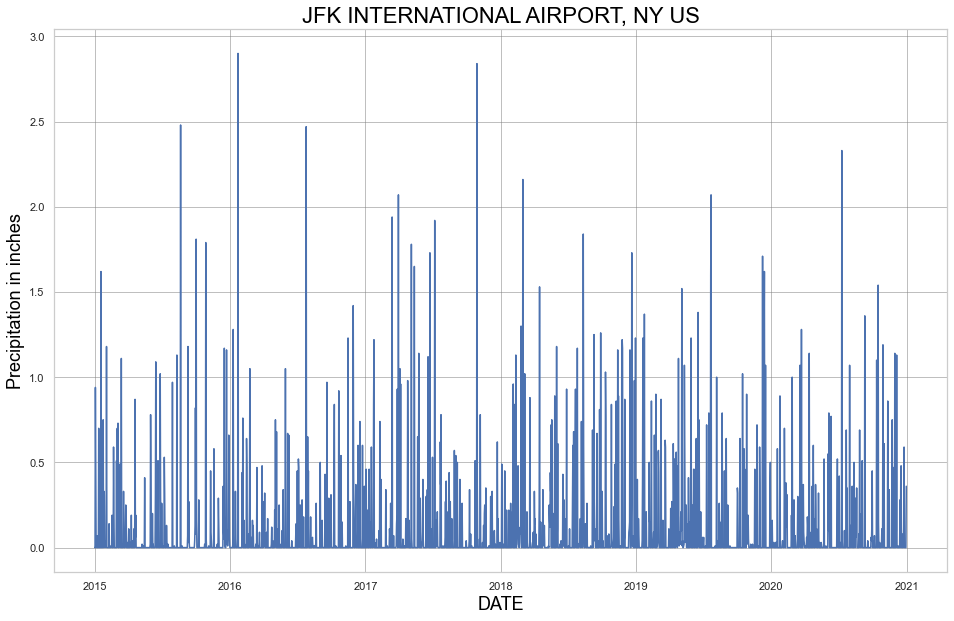

In [27]:
feature_list = ['PRCP']

for df_section in df_list_station:
    my_plot.plot_many(df_section, 'DATE', 'NAME', feature_list, 'Precipitation in inches')

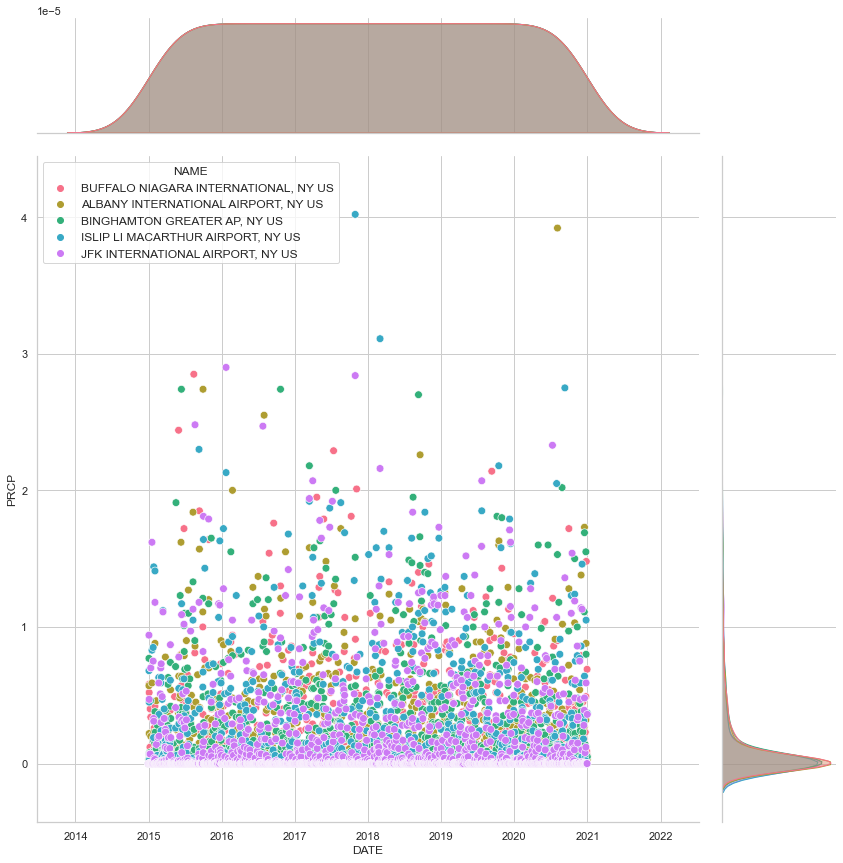

In [28]:
my_plot.join_plot_hue(data.get_df(), 'DATE', 'PRCP', 'NAME')

## Question/Point 2

ModuleNotFoundError: No module named 'geopandas'

## Question/Point 3

## ...

# Ending remarks

# Future work